<a href="https://colab.research.google.com/github/bvsvarshini/MNIST-Autoencoder-with-Keras/blob/main/MNIST_Autoencoder_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0961 - val_loss: 0.0382
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0347 - val_loss: 0.0263
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0254 - val_loss: 0.0219
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0217 - val_loss: 0.0193
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0192 - val_loss: 0.0174
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0175 - val_loss: 0.0162
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0160 - val_loss: 0.0150
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0152 - val_loss: 0.0144
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0146 - val_loss: 0.0138
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0140 - val_loss: 0.0132
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0135 - val_los

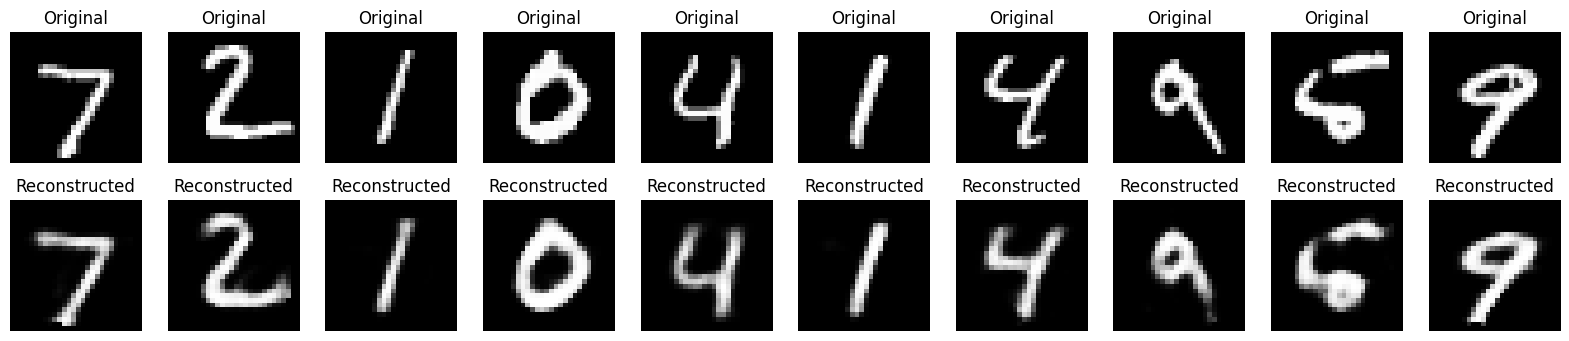

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist

(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

def create_autoencoder():
    input_img = Input(shape=(28 * 28,))
    encoded = Dense(128, activation='relu')(input_img)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(32, activation='relu')(encoded)

    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(28 * 28, activation='sigmoid')(decoded)

    autoencoder = Model(input_img, decoded)
    return autoencoder

autoencoder = create_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(
    X_train, X_train,
    epochs=20,
    batch_size=256,
    validation_data=(X_test, X_test)
)

loss = autoencoder.evaluate(X_test, X_test)
print(f"Test loss: {loss:.4f}")

reconstructed_images = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title("Original")
    ax.axis('off')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
    ax.set_title("Reconstructed")
    ax.axis('off')
plt.show()
